# capetools 🕶

> A set of python 🐍 tools to process and model PV

I put together a set of tools used to clean data and model bifacial systems using [pvfactors](http://github.com/SUNPOWER/pvfactors), [pvlib](https://github.com/pvlib/pvlib-python) and [bifacialvf](http://bifacialvf) 🌞

## Install

As of 02/2019: [bifacialvf](https://github.com/NREL/bifacialvf) has not yet merged this [PR](https://github.com/NREL/bifacialvf/pull/25), the simulate function cannot take arbitrary metereological data on the form of pandas DataFrames. So we are force to install a custom fork of bifacialvf from [here](https://github.com/tcapelle/bifacialvf/p). This is way, a formal release of capetools to PyPI is not possible rght now, so we have to install by cloning from github.

`pip install .`

or on editable mode, git clone this repo, and from within the repo install using:

`pip install -e .`

## Getting started 💪

In [ ]:
from capetools.imports import *
from capetools.utils.missing import *
from capetools.utils.tmy import read_pvgis
from capetools.modelling.mypvfactors import *
from capetools.modelling.mybifacialvf import *

In [ ]:
PATH = Path.cwd().parent/'data'
fname = PATH/'pvgis_tmy_chambery.csv'

We will ingest a PVGIS downloaded file for Chambery

In [ ]:
gps_data, months, tmy_data = read_pvgis(fname)

In [ ]:
tmy_data.head()

,temp,humidity,ghi,dni,dhi,infra,ws,wd,pressure
time(UTC),,,,,,,,,
2012-01-01 00:00:00,2.87,88.28,0.0,-0.0,0.0,259.63,1.33,170.0,99504.0
2012-01-01 01:00:00,3.59,90.07,0.0,-0.0,0.0,268.30,1.39,166.0,99508.0
2012-01-01 02:00:00,4.32,91.86,0.0,-0.0,0.0,276.97,1.45,162.0,99511.0
2012-01-01 03:00:00,5.04,93.64,0.0,-0.0,0.0,285.64,1.51,167.0,99517.0
2012-01-01 04:00:00,5.76,95.43,0.0,-0.0,0.0,294.32,1.57,171.0,99524.0


We can quickly look at missing data:

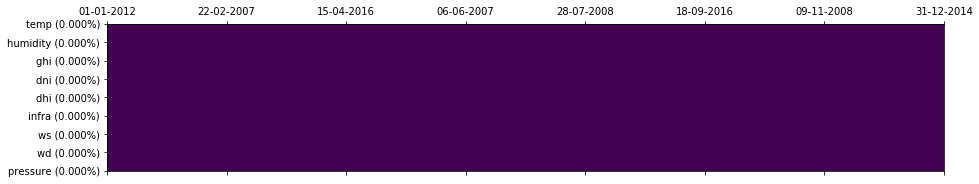

In [ ]:
plot_missing(tmy_data)

as expected, no missing data !

## Simulations

### pvfactors

In [ ]:
params = system_def(n_pvrows=3); params

{'n_pvrows': 3,
 'pvrow_height': 1.6218180900789148,
 'pvrow_width': 2.02,
 'tracking': False,
 'axis_azimuth': 0,
 'surface_tilt': 38,
 'surface_azimuth': 180,
 'albedo': 0.4,
 'gcr': 0.5,
 'rho_front_pvrow': 0.075,
 'rho_back_pvrow': 0.075,
 'cut': {0: {'front': 1, 'back': 7},
  1: {'front': 1, 'back': 7},
  2: {'front': 1, 'back': 7}}}

In [ ]:
data = get_data(fname, params)

In [ ]:
pvarray = run_pvfactors_simulation(data, params)

/home/tc256760/anaconda3/envs/fastai/lib/python3.7/site-packages/pvfactors/viewfactors/vfmethods.py:181: RuntimeWarning: invalid value encountered in true_divide
  vf_pvrow_to_gnd_surf * pvrow_surf_length / gnd_surf_length, 0.)
/home/tc256760/anaconda3/envs/fastai/lib/python3.7/site-packages/pvfactors/viewfactors/vfmethods.py:181: RuntimeWarning: divide by zero encountered in true_divide
  vf_pvrow_to_gnd_surf * pvrow_surf_length / gnd_surf_length, 0.)
/home/tc256760/anaconda3/envs/fastai/lib/python3.7/site-packages/pvfactors/viewfactors/vfmethods.py:531: RuntimeWarning: divide by zero encountered in true_divide
  vf_1_to_2 = (d1 + d2 - l1 - l2) / (2. * width)
/home/tc256760/anaconda3/envs/fastai/lib/python3.7/site-packages/pvfactors/viewfactors/vfmethods.py:531: RuntimeWarning: invalid value encountered in true_divide
  vf_1_to_2 = (d1 + d2 - l1 - l2) / (2. * width)
/home/tc256760/anaconda3/envs/fastai/lib/python3.7/site-packages/pvfactors/viewfactors/vfmethods.py:607: RuntimeWarning:

(-2, 10)

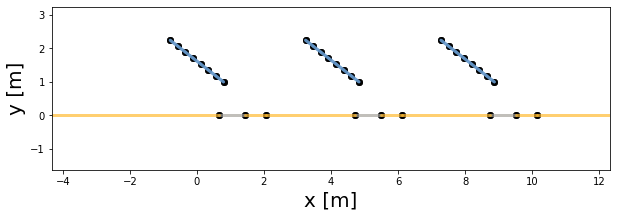

In [ ]:
ax = plot_idx(pvarray)
ax.set_xlim(-2, 10)

In [ ]:
res_pvfactors = individual_report(pvarray, index=data.index)

In [ ]:
res_pvfactors.head()

,qinc_0,qinc_1,qinc_2,qinc_3,qinc_4,qinc_5,qinc_6,qinc_front,qinc_back
time(UTC),,,,,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


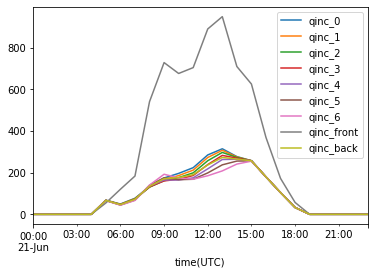

In [ ]:
res_pvfactors['21 June 2019'].plot();

### bifacialvf

In [ ]:
res_bifacialvf = run_bifacialvf_simulation(data)

  0%|          | 0/8760 [00:00<?, ?it/s]/home/tc256760/Apps/bifacialvf/bifacialvf/vf.py:300: RuntimeWarning: divide by zero encountered in double_scalars
  projectedX2 = PcellX + np.float64(PcellY) / math.tan(startElvDown);      # Projection of ElvDown to ground in +x direction (X1 and X2 opposite nomenclature for front irradiance method)
  0%|          | 40/8760 [00:00<00:22, 379.91it/s]

 
********* 
Running Simulation for TMY3:  Chambery
Location:   Chambery
Lat:  45.637001  Long:  5.881  Tz  -1.0
Parameters: beta:  0   Sazm:  180   Height:  0.5   rtr separation:  8.0   Row type:  interior   Albedo:  0.4
Saving into output.csv
 
 


100%|██████████| 8760/8760 [00:27<00:00, 314.85it/s]

Finished


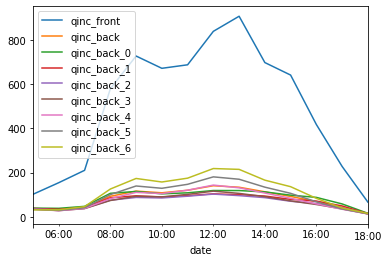

In [ ]:
res_bifacialvf['21 June 2019'].plot();

## Coontributing 👇
Read [nbdev](http://github.com/fastai/nbdev) documentation please.